In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,nltk

In [2]:
data = pd.read_excel('clean_data.xlsx')
data.head()

,Unnamed: 0,Text,Label,Cleaned
0,0,হেলো ম্যাডাম! আমাদের কনো ধরনের ভ্যাকসিনের প্রয়...,Negative,হেলো ম্যাডাম আমাদের কনো ধরনের ভ্যাকসিনের প্রয়ো...
1,1,হো*গার ভিত্রে টাইগার বোম মলম লাগাইলে এমনে ভাবে...,Negative,হো গার ভিত্রে টাইগার বোম মলম লাগাইলে এমনে ভাবে...
2,2,হো**গায় অতিরিক্ত কারেন্ট থাকলে যা হয় আরকি,Negative,হো গায় অতিরিক্ত কারেন্ট থাকলে যা হয় আরকি
3,3,হেডার কারেন্ট কমে নাই,Negative,হেডার কারেন্ট কমে নাই
4,4,হেডার মহিলা,Negative,হেডার মহিলা


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3920 non-null   int64 
 1   Text        3920 non-null   object
 2   Label       3920 non-null   object
 3   Cleaned     3920 non-null   object
dtypes: int64(1), object(3)
memory usage: 122.6+ KB


In [4]:
data.drop(columns={'Unnamed: 0'},axis=1,inplace=True)
data.dropna(inplace=True)

<AxesSubplot: xlabel='Label', ylabel='count'>

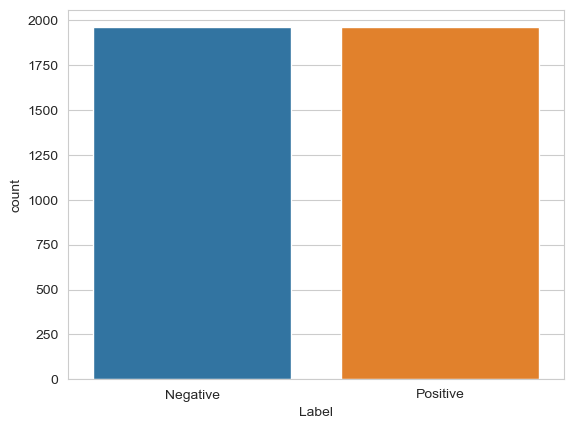

In [5]:
sns.set_style('whitegrid')
sns.countplot(x = 'Label', data = data)

In [6]:
# Remove the Text with least words
data['length'] = data['Cleaned'].apply(lambda x:len(x.split()))
dataset = data.loc[data.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Text".format(len(data)-len(dataset)),
      "\nTotal Text:",len(dataset))

After Cleaning: 
Removed 0 Small Text 
Total Text: 3920


In [7]:
dataset

,Text,Label,Cleaned,length
0,হেলো ম্যাডাম! আমাদের কনো ধরনের ভ্যাকসিনের প্রয়...,Negative,হেলো ম্যাডাম আমাদের কনো ধরনের ভ্যাকসিনের প্রয়ো...,29
1,হো*গার ভিত্রে টাইগার বোম মলম লাগাইলে এমনে ভাবে...,Negative,হো গার ভিত্রে টাইগার বোম মলম লাগাইলে এমনে ভাবে...,13
2,হো**গায় অতিরিক্ত কারেন্ট থাকলে যা হয় আরকি,Negative,হো গায় অতিরিক্ত কারেন্ট থাকলে যা হয় আরকি,8
3,হেডার কারেন্ট কমে নাই,Negative,হেডার কারেন্ট কমে নাই,4
4,হেডার মহিলা,Negative,হেডার মহিলা,2
...,...,...,...,...
3915,অনেক সুন্দর মাশাল্লাহ.হাহা রিয়েক্ট আর নেগেটিভ...,Positive,অনেক সুন্দর মাশাল্লাহ হাহা রিয়েক্ট আর নেগেটিভ...,11
3916,অনেক অনেক দোয়া রইল অফুরন্ত।,Positive,অনেক অনেক দোয়া রইল অফুরন্ত,5
3917,মোটামুটি ভালোই হয়েছে ভিডিওটা ।,Positive,মোটামুটি ভালোই হয়েছে ভিডিওটা,4
3918,বাংলাদেশ থেকে আপনার প্রতি অনেক অনেক ভালোবাসা,Positive,বাংলাদেশ থেকে আপনার প্রতি অনেক অনেক ভালোবাসা,7


In [8]:
def data_summary(dataset):
    
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.Cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Label.value_counts().to_dict().items()]
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Label==label].Cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        documents.append(len(list(dataset[dataset.Label==label].Cleaned)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Label==label].Cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

documents,words,u_words,class_names = data_summary(dataset)   


Class Name :  Negative
Number of Documents:1960
Number of Words:16686
Number of Unique Words:3238
Most Frequent Words:

না	272
কি	178
করে	174
এই	174
আর	132
হয়	120
একটা	114
তো	108
ও	90
সব	88

Class Name :  Positive
Number of Documents:1960
Number of Words:16568
Number of Unique Words:2338
Most Frequent Words:

অনেক	477
ভালো	375
সুন্দর	356
খুব	227
আপনার	196
জন্য	188
আপু	152
ধন্যবাদ	145
এই	143
না	139
Total Number of Unique Words:4792


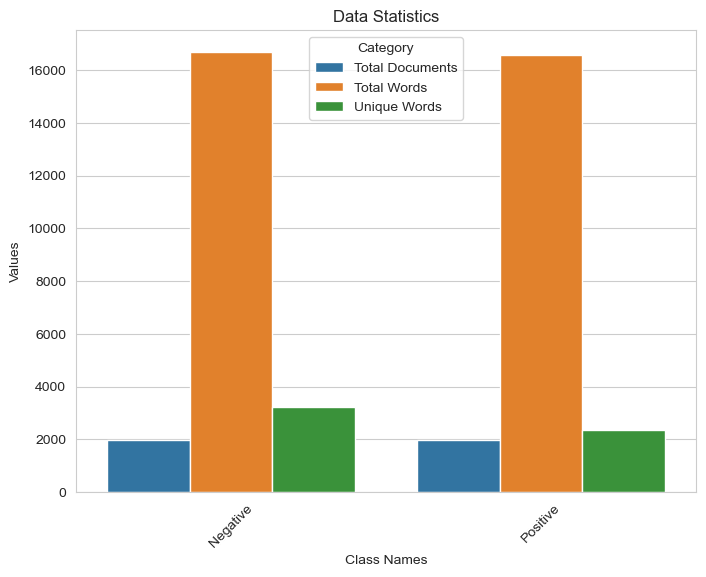

In [9]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

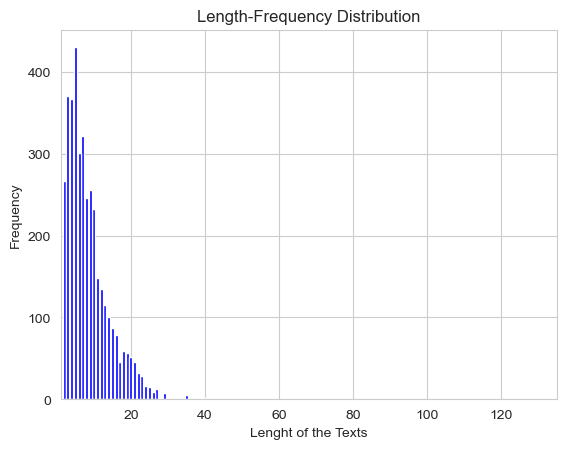

Maximum Length of a Text: 43
Minimum Length of a Text: 1
Average Length of a Text: 8.0


In [10]:
# Calculate the Text of each of the Text
dataset['TextLength'] = dataset.Cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.TextLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Text: {max(dataset.TextLength)}")
print(f"Minimum Length of a Text: {min(dataset.TextLength)}")
print(f"Average Length of a Text: {round(np.mean(dataset.TextLength),0)}")

In [11]:
dataset.groupby('Label').size().reset_index(name='counts')

,Label,counts
0,Negative,1960
1,Positive,1960


In [12]:
#Label Encoding Function
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def label_encoding(labels,bool):

    le = LabelEncoder()
    le.fit(labels)
    encoded_labels = le.transform(labels)
    labels = np.array(encoded_labels)
    class_names =le.classes_ 
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(labels[i],' ', encoded_labels[i],'\n')

    return labels

In [13]:
#Dataset Splitting Function
def dataset_split(texts,labels):

    X_train,X_test,y_train,y_test = train_test_split(texts,
                                                     labels,
                                                     train_size = 0.8,
                                                     test_size = 0.20,
                                                     random_state =42,
                                                     stratify=labels)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",texts.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test


In [14]:
#tfidf gram calculation 
def calc_gram_tfidf(texts,gram):

    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(texts)
    
    return tfidf,X

In [15]:
#Unigram Tf-idf value calculation
def calc_unigram_tfidf(texts):
    tfidf = TfidfVectorizer(use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(texts)
    
    return tfidf,X


In [16]:
#Bi-gram Tf-idf value calculation
def calc_bigram_tfidf(texts):
    tfidf = TfidfVectorizer(ngram_range=(1,2),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(texts)
    
    return tfidf,X


In [17]:
#Tri-gram Tf-idf value calculation
def calc_trigram_tfidf(texts):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(texts)
    
    return tfidf,X


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

In [19]:
def model_defination():
    
    lr_model = LogisticRegression(random_state = 123, 
                                  max_iter = 10000)
    
    dt_model = DecisionTreeClassifier(criterion = 'gini', 
                                      random_state = 0, 
                                      max_depth = 1, 
                                      min_samples_split = 25)
    
    rf_model = RandomForestClassifier(criterion ='entropy', 
                                      random_state = 13)
    
    mnb_model = MultinomialNB(alpha=0.431)
    
    knn_model = KNeighborsClassifier(n_neighbors=100, 
                                     metric = 'minkowski', 
                                     algorithm = 'ball_tree', 
                                     n_jobs = 10)
    
    lsvm_model = SVC(kernel = 'linear',
                     C = 0.2, 
                     probability=True, 
                     random_state = 0)
    
    ksvm_model = SVC(C= 1000,
                     kernel = 'rbf',
                     probability=True, 
                     gamma = 0.00015, 
                     random_state = 0)
    
    sgd_model = SGDClassifier(loss ='log',
                              penalty='l2', 
                              max_iter=5)
    
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM','SGD']
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model,sgd_model]
    
    return ml_models,model_names

In [20]:
def model_performace(model,X_train,X_test,y_train,y_test):
    
    my_dict = {}
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='micro'),4)*100 
    
    return my_dict  

In [21]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    performance_df = pd.DataFrame({'Accuracy':acc_list,
                                   'Precision':pr_list,
                                   'Recall':re_list,
                                   'F1 Score':f1_list},
                                  index =['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM','SGD'])
    performance_df.style.highlight_max(color = 'lightgreen', axis = 0)
    return performance_df

In [22]:
path = "json/"

In [23]:
## save the performance of the model for each gram feature 

import json

gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]

for i,gram in enumerate(ngrams):
    
    tfidf,feature = calc_gram_tfidf(dataset.Text,gram)
    
    labels = label_encoding(dataset.Label,False)
    
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    
    ml_models,model_names = model_defination()
    
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}

    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)

C:\Users\Afrime Araf\.conda\envs\tensorflow_gpu\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 5451

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 3920 
	Training		 3136 
	Test			 784


C:\Users\Afrime Araf\.conda\envs\tensorflow_gpu\lib\site-packages\sklearn\neighbors\_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Afrime Araf\.conda\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Afrime Araf\.conda\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:704: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Afrime Araf\.conda\envs\tensorflow_gpu\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 17544

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 3920 
	Training		 3136 
	Test			 784


C:\Users\Afrime Araf\.conda\envs\tensorflow_gpu\lib\site-packages\sklearn\neighbors\_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Afrime Araf\.conda\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Afrime Araf\.conda\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:704: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Afrime Araf\.conda\envs\tensorflow_gpu\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 29111

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 3920 
	Training		 3136 
	Test			 784


C:\Users\Afrime Araf\.conda\envs\tensorflow_gpu\lib\site-packages\sklearn\neighbors\_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\Afrime Araf\.conda\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Afrime Araf\.conda\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:704: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [24]:
accuracy1 = json.load(open('json/ml_performance_Unigram.json'))
table = performance_table(accuracy1)
table

,Accuracy,Precision,Recall,F1 Score
LR,92.60,92.60,92.60,92.60
DT,60.20,60.20,60.20,60.20
RF,96.30,96.30,96.30,96.30
MNB,96.30,96.30,96.30,96.30
KNN,79.85,79.85,79.85,79.85
Linear SVM,87.37,87.37,87.37,87.37
RBF SVM,91.07,91.07,91.07,91.07
SGD,95.79,95.79,95.79,95.79


In [25]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by RF at = 96.3
Highest F1-Score achieved by RF at = 96.3
Highest Precision Score achieved by RF at = 96.3
Highest Recall Score achieved by RF at = 96.3


In [26]:
accuracy2 = json.load(open('json/ml_performance_Bigram.json'))
table2 = performance_table(accuracy2)
table2

,Accuracy,Precision,Recall,F1 Score
LR,93.62,93.62,93.62,93.62
DT,60.20,60.20,60.20,60.20
RF,96.30,96.30,96.30,96.30
MNB,97.07,97.07,97.07,97.07
KNN,76.40,76.40,76.40,76.40
Linear SVM,85.84,85.84,85.84,85.84
RBF SVM,91.33,91.33,91.33,91.33
SGD,96.05,96.05,96.05,96.05


In [27]:
print(f"Highest Accuracy achieved by {table2.Accuracy.idxmax(axis = 0)} at = {max(table2.Accuracy)}")
print(f"Highest F1-Score achieved by {table2['F1 Score'].idxmax(axis = 0)} at = {max(table2['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table2['Precision'].idxmax(axis = 0)} at = {max(table2['Precision'] )}")
print(f"Highest Recall Score achieved by {table2['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by MNB at = 97.07000000000001
Highest F1-Score achieved by MNB at = 97.07000000000001
Highest Precision Score achieved by MNB at = 97.07000000000001
Highest Recall Score achieved by MNB at = 96.3


In [28]:
accuracy3 = json.load(open('json/ml_performance_Trigram.json'))
table3 = performance_table(accuracy3)
table3

,Accuracy,Precision,Recall,F1 Score
LR,94.13,94.13,94.13,94.13
DT,57.78,57.78,57.78,57.78
RF,96.17,96.17,96.17,96.17
MNB,97.19,97.19,97.19,97.19
KNN,82.78,82.78,82.78,82.78
Linear SVM,84.06,84.06,84.06,84.06
RBF SVM,91.33,91.33,91.33,91.33
SGD,96.43,96.43,96.43,96.43


In [29]:
print(f"Highest Accuracy achieved by {table3.Accuracy.idxmax(axis = 0)} at = {max(table3.Accuracy)}")
print(f"Highest F1-Score achieved by {table3['F1 Score'].idxmax(axis = 0)} at = {max(table3['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table3['Precision'].idxmax(axis = 0)} at = {max(table3['Precision'] )}")
print(f"Highest Recall Score achieved by {table3['Recall'].idxmax(axis = 0)} at = {max(table3['Recall'] )}")

Highest Accuracy achieved by MNB at = 97.19
Highest F1-Score achieved by MNB at = 97.19
Highest Precision Score achieved by MNB at = 97.19
Highest Recall Score achieved by MNB at = 97.19


# Final Model

 - Selected feature: Trigram
 - Selected model: MultinomialNB

In [30]:
# calculate the Tri-gram Tf-idf feature
cv,feature = calc_trigram_tfidf(dataset.Cleaned)

lables = label_encoding(dataset.Label,False)

X_train,X_test,y_train,y_test = dataset_split(texts=feature,labels=lables)

C:\Users\Afrime Araf\.conda\envs\tensorflow_gpu\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 28417

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 3920 
	Training		 3136 
	Test			 784


In [31]:
classifier1 = MultinomialNB(alpha=0.431)
classifier1.fit(X_train, y_train)

MultinomialNB(alpha=0.431)

In [32]:
y_pred = classifier1.predict(X_test)
y_pred[:10]

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [33]:
print(f"Train Accuracy is: {round(classifier1.score(X_train, y_train)*100,2)}%")
print(f"Test Accuracy is : {round(classifier1.score(X_test, y_test)*100,2)}%")

Train Accuracy is: 100.0%
Test Accuracy is : 97.19%


In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       392
           1       0.96      0.98      0.97       392

    accuracy                           0.97       784
   macro avg       0.97      0.97      0.97       784
weighted avg       0.97      0.97      0.97       784



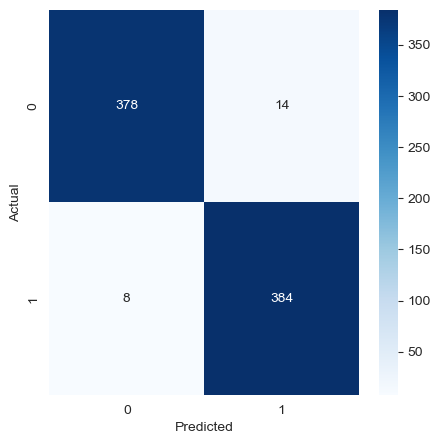

In [35]:
conf_mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()